                                              review sentiment
0  I really liked this Summerslam due to the look...  positive
1  Not many television shows appeal to quite as m...  positive
2  The film quickly gets to a major chase scene w...  negative
3  Jane Austen would definitely approve of this o...  positive
4  Expectations were somewhat high for me when I ...  negative
                                              review sentiment  \
0  I really liked this Summerslam due to the look...  positive   
1  Not many television shows appeal to quite as m...  positive   
2  The film quickly gets to a major chase scene w...  negative   
3  Jane Austen would definitely approve of this o...  positive   
4  Expectations were somewhat high for me when I ...  negative   

                                 preprocessed_review  
0  i really liked this summerslam due to the look...  
1  not many television shows appeal to quite as m...  
2  the film quickly gets to a major chase scene w...  
3  ja

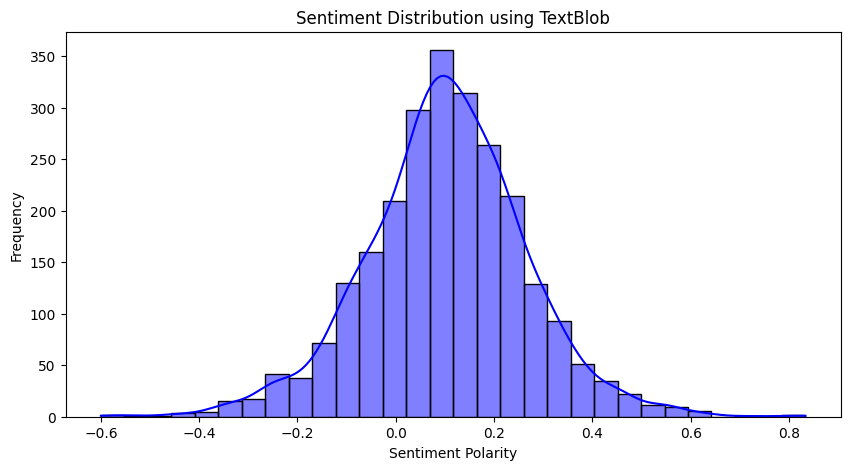

In [15]:
import pandas as pd
import csv
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

rows = []
with open('IMDB Dataset.csv', encoding='utf-8') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        rows.append(row)

df = pd.DataFrame(rows[1:], columns=rows[0])

df = df.sample(frac=0.05, random_state=42).reset_index(drop=True)
print(df.head())

def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'\@\w+|\#', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

df['preprocessed_review'] = df['review'].apply(preprocess_text)
print(df.head())

def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['textblob_sentiment'] = df['preprocessed_review'].apply(analyze_sentiment_textblob)

print(df.head())

plt.figure(figsize=(10, 5))
sns.histplot(df['textblob_sentiment'], bins=30, kde=True, color='blue')
plt.title('Sentiment Distribution using TextBlob')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()
